# ASR Assignment 2019-20

This notebook has been provided as a template to get you started on the assignment.  Feel free to use it for your development, or do your development directly in Python.

You can find a full description of the assignment [here](http://www.inf.ed.ac.uk/teaching/courses/asr/2019-20/coursework.pdf).

You are provided with two Python modules `observation_model.py` and `wer.py`.  The first was described in [Lab 3](https://github.com/Ore-an/asr_lab3/blob/master/asr_lab3.ipynb).  The second can be used to compute the number of substitution, deletion and insertion errors between ASR output and a reference text.

It can be used as follows:

```python
import wer

my_refence = 'A B C'
my_output = 'A C C D'

wer.compute_alignment_errors(my_reference, my_output)
```

This produces a tuple $(s,d,i)$ giving counts of substitution,
deletion and insertion errors respectively - in this example (1, 0, 1).  The function accepts either two strings, as in the example above, or two lists.  Matching is case sensitive.

## Template code

Assuming that you have already made a function to generate an WFST, `create_wfst()` and a decoder class, `MyViterbiDecoder`, you can perform recognition on all the audio files as follows:


# Q:Why is determinize() change the WER??

In [1]:
import glob
import os
import wer
import observation_model
import openfst_python as fst
import time
from experiment import *
from tqdm import tqdm_notebook as tqdm
import pdb
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import cProfile

%reload_ext autoreload
%autoreload 2

def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [2]:
def parse_lexicon(lex_file):
    """
    Parse the lexicon file and return it in dictionary form.

    Args:
        lex_file (str): filename of lexicon file with structure '<word> <phone1> <phone2>...'
                        eg. peppers p eh p er z

    Returns:
        lex (dict): dictionary mapping words to list of phones
    """

    lex = {}  # create a dictionary for the lexicon entries (this could be a problem with larger lexica)
    with open(lex_file, 'r') as f:
        for line in f:
            line = line.split()  # split at each space
            lex[line[0]] = line[1:]  # first field the word, the rest is the phones
    return lex
lex = parse_lexicon('lexicon.txt')

In [3]:
def ave_length():
    cum_phones=0
    cum_aud_frms=0
    om = observation_model.ObservationModel()

    for wav_file in glob.glob('/group/teaching/asr/labs/recordings/*.wav'):
        trans = read_transcription(wav_file).split()
        cum_phones += 3*sum([len(lex[w]) for w in trans])
#         print(wav_file)
        om.load_audio(wav_file)
        cum_aud_frms += om.observation_length()
#         print(om.observation_length())
    print(cum_phones)
    print(cum_aud_frms)
    print(cum_words/cum_aud_frms)
    
ave_length()

KeyboardInterrupt: 

In [2]:
23727/94803

0.25027688997183634

## Task 1 - Initial systems

In [13]:
math.e**-0.105 + math.e**-2.3

1.0005833663090693

In [5]:
!ls

experiment.py	      Personal_copy.ipynb	   weight_dictionary.txt
lexicon_sil.txt       phonelist.txt		   wer.py
lexicon-toy.txt       __pycache__		   WFST_Variants.py
lexicon.txt	      README.md			   yichao_test.ipynb
obj		      Untitled.ipynb
observation_model.py  weight_dictionary_final.txt


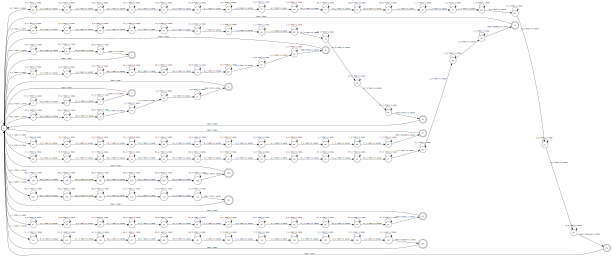

In [2]:
MyWFST(lexicon='lexicon.txt').create_wfst_word_output()

In [3]:
f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output()
time_cost,computation_counter,num_states,num_arcs,tot_errors,tot_words = run_exp(f,num_test = 180)



    Run time: 910.3149743080139, 
    Number of forward computations: 22753320,
    Number of states and arcs: 127 252,
    Number of errors 2215 ([ 728  205 1282]) in 2177 words 1.0174552135966928.
    


## Task2 - System tuning

#### varying the self-loop probabilities

In [4]:
# array of different self loop probabilities
self_prob = [0.99]
results_sp = defaultdict(list)
for sp in self_prob:
    weight_dict = {'self-loop': sp,'next': 1-sp}
    f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output(weight_dictionary = weight_dict)
    time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
    results_sp[sp] = [time_cost,computation_counter,num_state,num_arc,tot_error]



    Run time: 923.5809381008148, 
    Number of forward computations: 22753213,
    Number of states and arcs: 127 252,
    Number of errors 1486 ([602 539 345]) in 2177 words 0.6825907211759302.
    


In [5]:
# array of different self loop probabilities
self_prob = np.linspace(0.2,0.8,num=3)
results_sp = defaultdict(list)
for sp in self_prob:
    weight_dict = {'self-loop': sp,'next': 1-sp}
    f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output(weight_dictionary = weight_dict)
    time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
    results_sp[sp] = [time_cost,computation_counter,num_state,num_arc,tot_error]



    Run time: 895.570962190628, 
    Number of forward computations: 22754595,
    Number of states and arcs: 127 252,
    Number of errors 1824 ([696 284 844]) in 2177 words 0.8378502526412495.
    




    Run time: 918.5474457740784, 
    Number of forward computations: 22753086,
    Number of states and arcs: 127 252,
    Number of errors 1625 ([668 368 589]) in 2177 words 0.7464400551217272.
    




    Run time: 917.3959264755249, 
    Number of forward computations: 22752231,
    Number of states and arcs: 127 252,
    Number of errors 1533 ([620 427 486]) in 2177 words 0.7041800643086816.
    


In [6]:
save_obj(results_sp,"task2_tranp_result")

In [3]:
load_obj('task2_tranp_result')

defaultdict(list,
            {0.2: [857.3872385025024, 20703226, 116, 230, 1856],
             0.5: [855.3699233531952, 20645023, 116, 230, 1572],
             0.8: [852.8390629291534, 20601861, 116, 230, 1465]})

####  final probabilities

In [2]:
# array of different final probabilities
final_prob = [0.01]
results_fp = defaultdict(list)
for fp in final_prob:
    f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output(fin_probability = fp)
    time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
    results_fp[fp] = [time_cost,computation_counter,num_state,num_arc,tot_error]



    Run time: 991.083327293396, 
    Number of forward computations: 22871429,
    Number of states and arcs: 127 252,
    Number of errors 1888 ([739 273 876]) in 2177 words 0.8672485071198898.
    


In [4]:
# array of different final probabilities
final_prob = np.linspace(0.1,0.8,num=3)
results_fp = defaultdict(list)
for fp in final_prob:
    f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output(fin_probability = fp)
    time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
    results_fp[fp] = [time_cost,computation_counter,num_state,num_arc,tot_error]



    Run time: 992.8875956535339, 
    Number of forward computations: 22817744,
    Number of states and arcs: 127 252,
    Number of errors 2006 ([ 733  244 1029]) in 2177 words 0.9214515388148828.
    




    Run time: 956.2374608516693, 
    Number of forward computations: 22776547,
    Number of states and arcs: 127 252,
    Number of errors 2100 ([ 737  222 1141]) in 2177 words 0.9646302250803859.
    




    Run time: 985.304235458374, 
    Number of forward computations: 22759805,
    Number of states and arcs: 127 252,
    Number of errors 2183 ([ 726  214 1243]) in 2177 words 1.0027560863573726.
    


In [9]:
itemsave_obj(results_fp,"task2_finalp_result")

#### use baum-welch to update weights

In [10]:
weight_dictionary=load_weight_dictionary('weight_dictionary_nosil.txt')
f = MyWFST(lexicon='lexicon.txt',weight_dictionary=weight_dictionary).create_wfst_word_output()
train_Baum_Welch(f=f,n=5,save=True)

Round 1 of Baum-Welch...


ValueError: math domain error

In [2]:
# load weight_dictionary
results_bw = defaultdict(list)
w_d = load_weight_dictionary(filename = 'weight_dictionary_nosil.txt')
f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output(weight_dictionary=w_d)
time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
results_bw['bw'] = [time_cost,computation_counter,num_state,num_arc,tot_error]



    Run time: 966.418381690979, 
    Number of forward computations: 22756424,
    Number of states and arcs: 127 252,
    Number of errors 1445 ([591 456 398]) in 2177 words 0.6637574644005512.
    


In [ ]:
save_obj(results_bw,"task2_baumwelch_result")

#### using transitions to each word based on unigram word probabilities (see advanced task)

#### add sil to lexicon

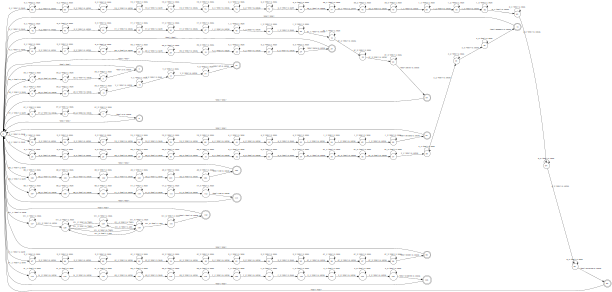

In [10]:
f = MyWFST(lexicon='lexicon_sil.txt').create_wfst_word_output()
f

In [11]:
# compare lexicon with silence and without
f = MyWFST(lexicon='lexicon_sil.txt').create_wfst_word_output()
results_lex_sil = defaultdict(list)

time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
results_lex_sil['lexicon_sil'] = [time_cost,computation_counter,num_state,num_arc,tot_error]



    Run time: 939.6964650154114, 
    Number of forward computations: 24153778,
    Number of states and arcs: 133 268,
    Number of errors 1475 ([657 351 467]) in 2177 words 0.6775378961874139.
    


In [12]:
save_obj(results_lex_sil,"task2_sil_result")

## Task3 - Pruning

In [13]:
# compare a range fo different pruning thresholds
thresholds = np.linspace(0.1,0.99,num=5,endpoint=False)
results_prun = defaultdict(list)

for thresh in thresholds:
    f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output()
    time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180,
                                                                                 beam_width=-math.log(thresh))
    results_prun[thresh] = [time_cost,computation_counter,num_state,num_arc,tot_error]

No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the ob

No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the ob

No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the ob

No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the ob

No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the ob

In [14]:
save_obj(results_prun,"task3_pruning_result")

In [15]:
results_prun = load_obj("task3_pruning_result")
results_prun

defaultdict(list,
            {0.1: [362.41342067718506, 5487107, 127, 252, 2885],
             0.278: [315.1045732498169, 3937419, 127, 252, 3101],
             0.45599999999999996: [294.3781006336212, 3106100, 127, 252, 3305],
             0.634: [278.5357015132904, 2676169, 127, 252, 3426],
             0.8119999999999999: [270.3005063533783, 2408269, 127, 252, 3321]})

## Task4 - Advanced topics

#### tree structure

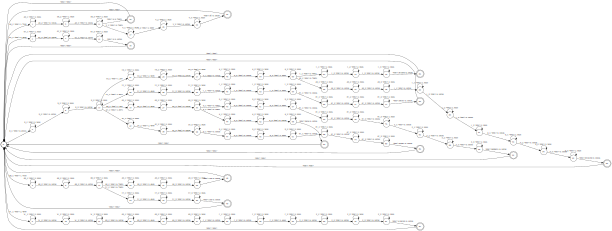

In [16]:
MyWFST().create_wfst_word_output(tree_struc= True)

In [17]:
results_strc = defaultdict(list)

f = MyWFST().create_wfst_word_output(tree_struc= True)
time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
results_strc['tree'] = [time_cost,computation_counter,num_state,num_arc,tot_error]



    Run time: 712.6523730754852, 
    Number of forward computations: 17096838,
    Number of states and arcs: 97 192,
    Number of errors 2215 ([ 728  205 1282]) in 2177 words 1.0174552135966928.
    


In [18]:
save_obj(results_strc,"task4_tree_result")

#### weight look ahead

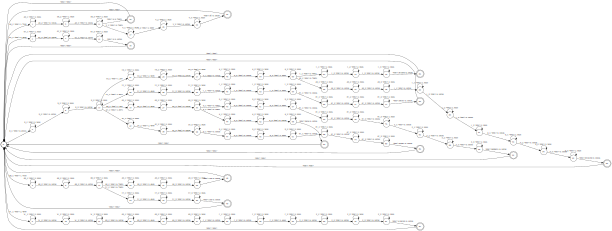

In [19]:
MyWFST(lexicon='lexicon.txt').create_wfst_word_output(tree_struc= True)

In [20]:
thresholds = np.linspace(0.1,0.99,num=3,endpoint=True)
results_push = defaultdict(list)

for thresh in thresholds:
    f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output(weight_push = True,tree_struc= True)
    time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180,
                                                                                 beam_width=-math.log(thresh))
    results_push[thresh] = [time_cost,computation_counter,num_state,num_arc,tot_error]

No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the ob

No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the ob

No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the ob

In [6]:
thresholds = [0.99]
results_push = defaultdict(list)

for thresh in thresholds:
    f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output(weight_push = True,tree_struc= True)
    time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180,
                                                                                 beam_width=-math.log(thresh),
                                                                                verbose=True)
    results_push[thresh] = [time_cost,computation_counter,num_state,num_arc,tot_error]

No path got to the end of the observations.
/group/teaching/asr/labs/recordings/0000.wav
recognized words:  
correct words:  where's peter piper
No path got to the end of the observations.
/group/teaching/asr/labs/recordings/0001.wav
recognized words:  
correct words:  peck peppers piper pickled picked a
No path got to the end of the observations.
/group/teaching/asr/labs/recordings/0002.wav
recognized words:  
correct words:  peter piper picked a peck
No path got to the end of the observations.
/group/teaching/asr/labs/recordings/0003.wav
recognized words:  
correct words:  peter picked piper
No path got to the end of the observations.
/group/teaching/asr/labs/recordings/0004.wav
recognized words:  
correct words:  picked a peck peter piper picked a peck peter piper pickled peppers peter piper picked a peck



KeyboardInterrupt: 

In [21]:
save_obj(results_push,"task4_look_ahead")

#### different language models

In [5]:
# different N gram language models
ngrams = ['unigram']
results_lm = defaultdict(list)
# ngrams = ['unigram']
for lm in ngrams:
    f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output(lm = lm)
    time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
    results_lm[lm] = [time_cost,computation_counter,num_state,num_arc,tot_error]



    Run time: 970.5038266181946, 
    Number of forward computations: 22757285,
    Number of states and arcs: 127 252,
    Number of errors 2129 ([ 713  227 1189]) in 2177 words 0.9779513091410198.
    


In [6]:
# different N gram language models
ngrams = ['bigram']
results_lm = defaultdict(list)
# ngrams = ['bigram']
for lm in ngrams:
    f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output(lm = lm)
    time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
    results_lm[lm] = [time_cost,computation_counter,num_state,num_arc,tot_error]



    Run time: 10953.31364440918, 
    Number of forward computations: 288597906,
    Number of states and arcs: 1639 3264,
    Number of errors 2033 ([ 684  232 1117]) in 2177 words 0.9338539274230593.
    


In [ ]:
save_obj(results_lm,"task4_lm_result")